In [273]:
#solution_dsci_chapter_07_machine_learning.ipynb

#the normal imports, etc.
import numpy as np              
import pandas as  pd            
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import seaborn as sns
import scipy
import math
datafile='earthquakes.csv'

#useful if you want the directory this script is in
if '__file__' in dir():
    path, _=os.path.split(__file__)  
else: path=os.getcwd() 
    
filename=os.path.join(path, datafile)


#pick off just the desired columns
df=pd.read_csv(filename, usecols=['depth', 'mag',  'place'])

#parse out the 'place' column 
df['place']=df['place'].astype(str)
df['place']=df['place'].str.split(',').str.get(1)
df['place']=df['place'].str.strip()
df['place']=df['place'].str.replace("CA", "California")

df.head(3)

ok = df.query("place=='Oklahoma'")
cal = df.query("place=='California' and depth>0")

quakes=pd.concat([ok, cal])                   #ok on top, then cal
quakes.reset_index(inplace=True, drop=True)   #make new (unique) index
quakes.head(2)


,depth,mag,place
0,6.125,2.5,Oklahoma
1,6.720,3.1,Oklahoma


In [274]:
quakes.tail(2)

,depth,mag,place
125,3.65,2.48,California
126,13.14,2.77,California


In [275]:
quakes.describe()

,depth,mag
count,127.00000,127.000000
mean,6.41948,2.835354
std,5.50168,0.362972
min,0.69000,2.450000
25%,3.12000,2.570000
50%,5.00000,2.730000
75%,6.89850,2.950000
max,37.62000,4.300000


In [276]:
#dependent and independent variables
print(quakes.columns)
iv_names=['depth', 'mag']
dv_name='place'

Index(['depth', 'mag', 'place'], dtype='object')


In [277]:
#create categorical data descriptions
auto_cats=pd.Categorical(quakes['place'])
quakes['place_ix']=auto_cats.codes
quakes.head(2)
auto_cats.describe()

,counts,freqs
categories,,
California,72,0.566929
Oklahoma,55,0.433071


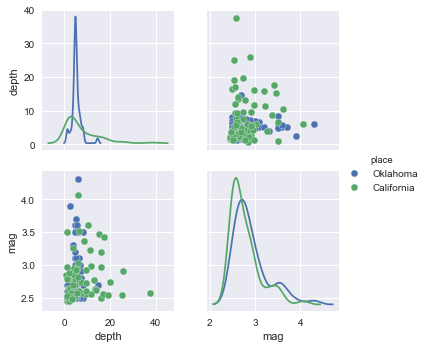

In [278]:
#have a look
sns.set()
sns.pairplot(quakes[['depth', 'mag', 'place']],
                 hue="place", 
                 diag_kind="kde")

In [279]:
#Run the D'Agostino K-squared (skew+kurotsis) test

p_target=.05   #if the p-value is less that this, we fail the test

for iv in iv_names:
    data=quakes[iv]
    statistic, p =scipy.stats.normaltest(data)
    if p<p_target:
        result='FAILED. SAD!'
    else: result='passed'
    print("\tfeature: {:<10} {:<20} p={:<10}".\
          format(iv, result, round(p,4)))

	feature: depth      FAILED. SAD!         p=0.0       
	feature: mag        FAILED. SAD!         p=0.0       


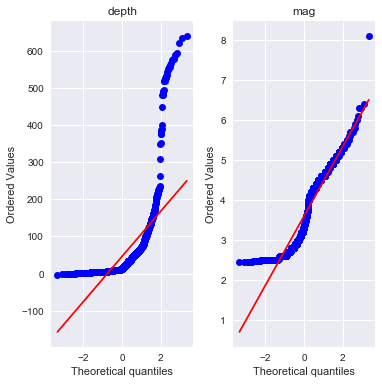

In [280]:
#create a plot object
plt.figure()

#set up the rows/columns for our plot object
cols=3
rows=math.ceil(len(iv_names)/cols) 

row=1; col=1; subplot=1
for iv in iv_names:    
    data=df[iv]                            #grab the data
    plt.subplot(rows, cols, subplot)       #create the subplot object
    scipy.stats.probplot(data, plot=plt)   #stuff it w/ data
    plt.title(iv)                          #give it a nice title
    #reset indices 
    col+=1
    if col>cols: 
        col=1
        row+=1
    subplot+=1

#spruce it up aesthetically 
fig=plt.gcf()   #get current figure - figure object is main container
fig.canvas.set_window_title("Q-Q Charts")

plt.tight_layout() #alternative:  plt.subplots_adjust() 

In [281]:
#Hmmm ... a little sketchy, but let's forge on.

In [282]:
#spin up an instance of the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)


In [283]:
#split the data file
from sklearn.model_selection import train_test_split

#could do this manually, but it's built-in.  ".5" makes a 50/50 split
train, test=train_test_split(quakes, test_size=.5)

train_data = train[['depth', 'mag']].values
train_class_ix=train['place_ix']

test_data = test[['depth', 'mag']].values
test_class_ix=test['place_ix']
#train_data

In [284]:

#use fit() to produce component vectors
train_result=lda.fit(train_data, train_class_ix)

#raw_data = quakes[iv_names].values  #a ndarray.
tlda_result=train_result.transform(train_data)
 
#train_success_rate=train_result.score(train_data, train_class_ix)
print("Training success rate:", round(train_success_rate, 2))

Training success rate: 0.59


In [285]:
#Analyze the withheld test data against training model
test_success_rate=train_result.score(test_data, test_class_ix)
print("Test success rate ('naive' data):", round(test_success_rate, 2))

Test success rate ('naive' data): 0.59
